<img src="banner.jpg" alt="title" >

The [Pima](https://en.wikipedia.org/wiki/Pima_people) are a group of Native Americans living in an area corresponding to the central part of the modern state of Arizona. In the recent years, due to a sudden shift from traditional agricultural crops to processed foods together with reduced levels of physical activity, this group developed the highest prevalence of type 2 diabetes in the world. Consequently, they have been the subject of numerous studies.

We will use a dataset containing the medical records of 768 Pima women, taken from [Kaggle](https://www.kaggle.com/kumargh/pimaindiansdiabetescsv). We will use the data to predict the onset of diabetes in the population. A short decription of each variable within the databaes is given below:

1. pregnancies = Number of times pregnant


2. glucose = Plasma glucose concentration measured in an oral glucose tolerance test


3. blood_pressure = Diastolic blood pressure (mm Hg)


4. skin_thickness = Triceps skin fold thickness (mm)


5. insulin = 2-Hour serum insulin (mu U/ml)


6. bmi = Body mass index (weight in kg/(height in m)^2)


7. pedi = Diabetes pedigree function


8. age = Age (years)


9. diabetes_onset = class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

The variables from 1 to 8 are our predictors $x_i$, whilst the 9th variable is our response $y$. We seek to develop a predictive model to evaluate $y$ and a function of $x_i$.

In [1]:
#import useful libraries
import numpy as np #package for scientific computing with Python, including operations with multidimensional arrays
import pandas as pd #data analysis library
import seaborn as sns #data visualization library
import matplotlib.pyplot as plt #plotting library
%matplotlib inline

In [2]:
#setting up plotting standards
params = {
    'axes.grid': True,
    'text.usetex' : False,
    'lines.markersize' :5,
}
plt.rcParams.update(params)

sns.set_style("whitegrid")
sns.set_context("notebook")

***
# <span style="color:#0741ad">Data Import, EDA and Preparation</span>
***

We will now import the data using Pandas' capabilites and perform Exploratory Data Analysis (EDA) to gain a better understanding of our dataset before using to train and test our ML algorithms.

In [3]:
df=pd.read_csv('pima-indians-diabetes.csv') #the data will be read in as a Pandas DataFrame object

In [4]:
df.head() #print the first 5 entries of the dataframe

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedi,age,diabetes_onset
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies       768 non-null int64
glucose           768 non-null int64
blood_pressure    768 non-null int64
skin_thickness    768 non-null int64
insulin           768 non-null int64
bmi               768 non-null float64
pedi              768 non-null float64
age               768 non-null int64
diabetes_onset    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedi,age,diabetes_onset
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Seaborn is a powerful library that can be used to perform visual EDA with just a few lines of code. 

C:\Users\andde\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\andde\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


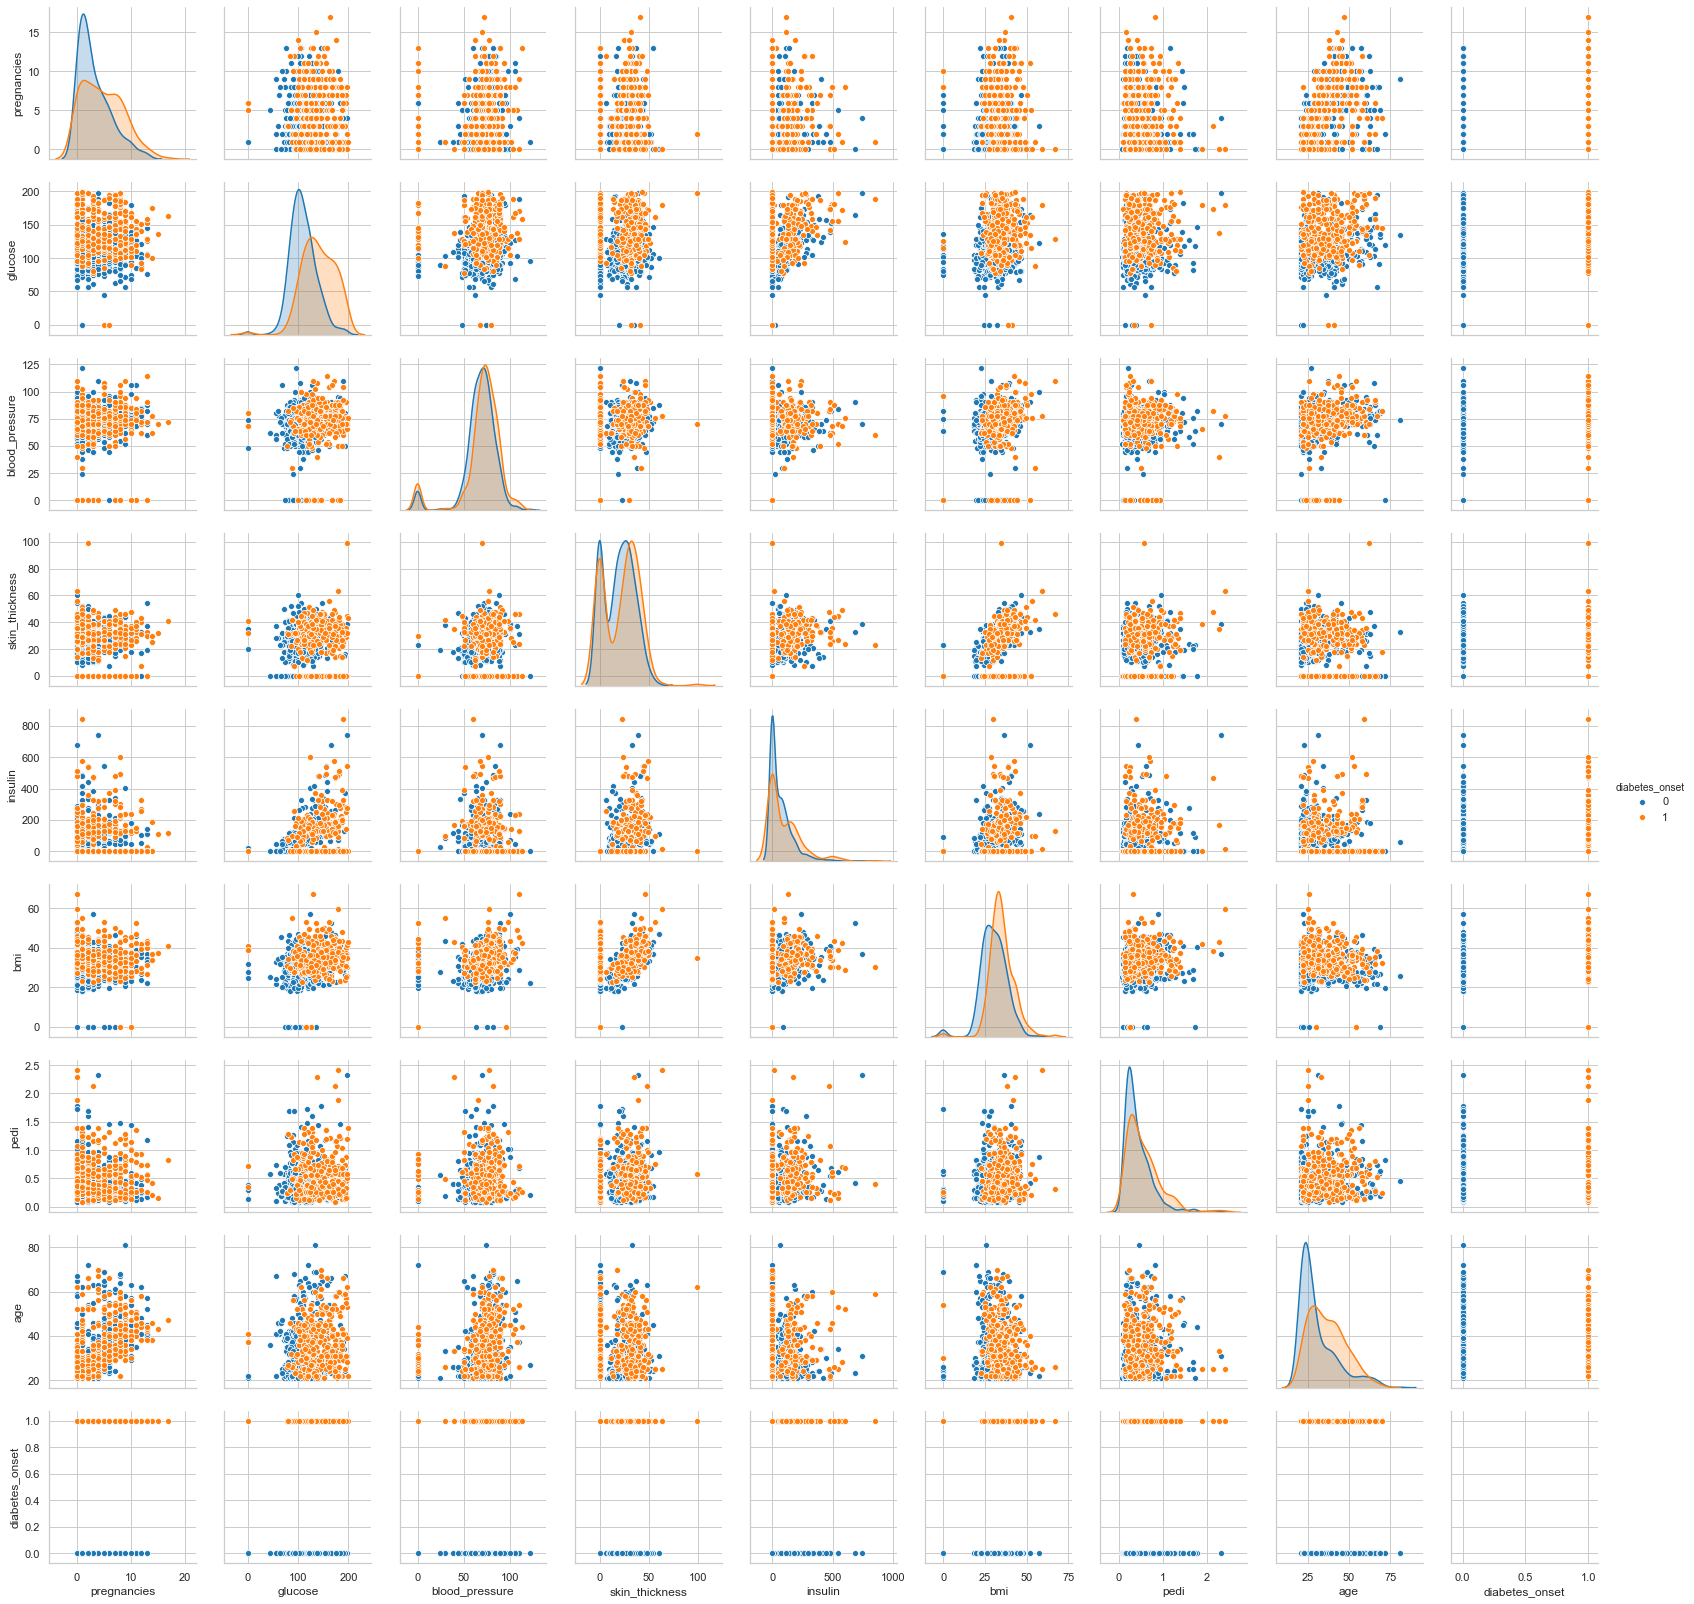

In [7]:
sns.pairplot(df,hue='diabetes_onset') #use alt+tab in a Jupyter Notebook the visualise the doctstring of a function

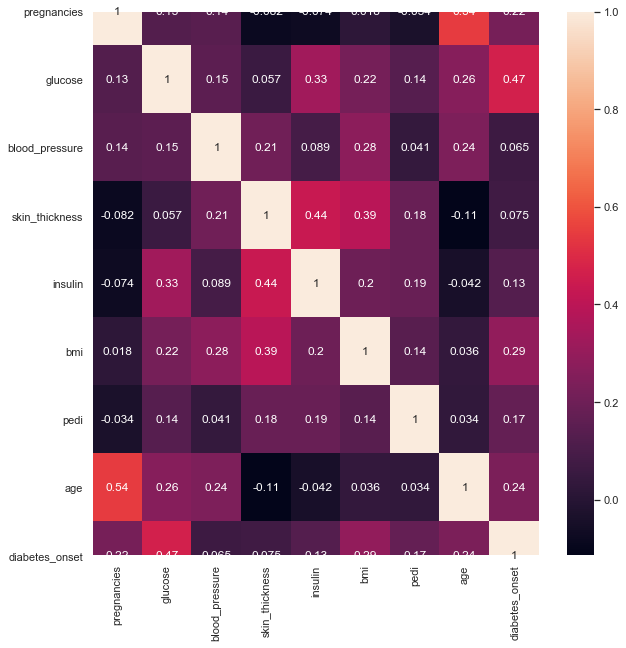

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True) #shows an heatmap of the correlation between the different variables
#sns.heatmap(df.corr(),annot=True, cmap="BuGn_r") #change the colourmap

Remember that **correlation does not imply causation**, and proof of this can be found [here](https://www.tylervigen.com/spurious-correlations). However, a strong correlation between predictors and response usually will help to build accurate models.

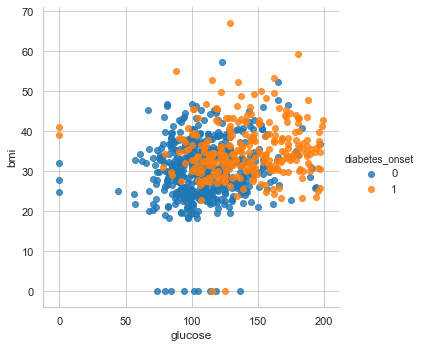

In [9]:
#scatter plot of the two predictors which have the higher correlation with class
#the two predictors are uncorrleated with each other
sns.lmplot(x='glucose',y='bmi',data=df,hue='diabetes_onset',fit_reg=False)

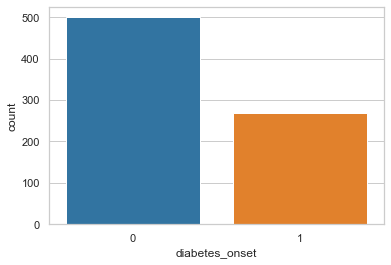

In [10]:
#check the "balance" of the dataset
sns.countplot(x='diabetes_onset',data=df)

In [11]:
df['diabetes_onset'].value_counts()

0    500
1    268
Name: diabetes_onset, dtype: int64

In [12]:
pos_frac=df['diabetes_onset'].sum()/df['diabetes_onset'].count()

In [13]:
print(f'Fraction of positives in class is {100*pos_frac:{1}.{4}}%')

Fraction of positives in class is 34.9%


In [14]:
print(f'Fraction of negatives in class is {100*(1-pos_frac):{1}.{4}}%')

Fraction of negatives in class is 65.1%


## <span style="color:#0741ad">Train-test split and normalisation of the features</span>
We will use 70% of the database to train the machine learning algorithms. The trained model will then be tested on the remaining 30% of the data in the cross-validation step to evaluate the test error.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=df.drop('diabetes_onset',axis=1) #X is our features (independent variables) array
X.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
y=df['diabetes_onset']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Some ML algorithms benefit from operating with [scaled features](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e). For this purpose, we will use the StandardScaler utility provided by SKLearn, which will scale the features in order to obtain a mean equal to zero and a standard deviation equal to to one.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
#scaled features (the response does not need scaling)
scaler = StandardScaler()
scaler.fit(X)
X_scaled_arr = scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled_arr,columns=X.columns)
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
pregnancies       768 non-null float64
glucose           768 non-null float64
blood_pressure    768 non-null float64
skin_thickness    768 non-null float64
insulin           768 non-null float64
bmi               768 non-null float64
pedi              768 non-null float64
age               768 non-null float64
dtypes: float64(8)
memory usage: 48.1 KB


In [21]:
X_scaled.describe() #mean=0, std=1

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedi,age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [22]:
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.3, random_state=101)

***
# <span style="color:#0741ad">Multivariate Logistic Regression</span>
***

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lm = LogisticRegression(penalty='none',solver='saga')
lm.fit(X_train,y_train)

C:\Users\andde\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred_lm = lm.predict(X_test)

In [26]:
from sklearn import metrics

For each machine learning algorithm we will evaluate the accuracy in the prediction of the test data as the main performance metric. We will also evaluate the accuracy in the prediction of the training data to keep an eye on possible overfitting issues.

In [27]:
acc_lm=metrics.accuracy_score(y_test,pred_lm)
np.round(acc_lm,5)

0.67532

In [28]:
acc_lm_train=metrics.accuracy_score(y_train,lm.predict(X_train))
np.round(acc_lm_train,5)

0.6797

The performance of the model on the test and training data are very close, which is a good indicator of the absence of overfitting. 

Since our dataset is not balanced, we will also evaluate the balanced accuracy on the training set for each algorithm.

In [29]:
balacc_lm=metrics.balanced_accuracy_score(y_test, pred_lm)
np.round(balacc_lm,5)

0.58815

In [30]:
lm_metrics=[acc_lm, balacc_lm]

In [31]:
conf_matrix_lm=pd.DataFrame(metrics.confusion_matrix(y_test,pred_lm),columns=['predicted_no','predicted_yes'],index=['actual_no','actual_yes'])
conf_matrix_lm

,predicted_no,predicted_yes
actual_no,132,18
actual_yes,57,24


In [32]:
print(metrics.classification_report(y_test,pred_lm,digits=5))

              precision    recall  f1-score   support

           0    0.69841   0.88000   0.77876       150
           1    0.57143   0.29630   0.39024        81

    accuracy                        0.67532       231
   macro avg    0.63492   0.58815   0.58450       231
weighted avg    0.65389   0.67532   0.64253       231



***
# <span style="color:#0741ad">2.3 Metrics for Classification Problems</span> 
***
It is natural wanting to know which model is the "best" in terms of "accuracy" of the predictions. In most cases this question does not have a univocal answer. In general, in order to determine which model is the "best" for a given problem, one has to answer another question first: "Which challange am I trying to solve with my model?". Based on the answer to the latter question, one can then pick up the more suitable metrics to evaluate the "acccuracy" of the model. In classifcation problems, there are several metrics to judge the performance of a model, and accuracy is just one of them (perhaps the most popular one). In the following we will provide an overview of the most commonly used metrics for classification problems. For the sake of simplicity we will refer to binary classification. For multi-label classification the metrics are usually just a generalisation of those used for binary cases. More details on this topic can be found in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html) and in [this blogpost](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9).

## <span style="color:#0741ad">2.3.1 Confusion Matrix</span> 
In a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) each row represents the instances in an actual class whilst each column represents the instances in a predicted class. In the case of binary classification, the confusion matrix has the following form:

|          Labels     | Predicted No | Predicted Yes|
| :------------- | :----------: | -----------: |
|  **Actual No**     | TN          |  FP           |
|  **Actual Yes**   | FN            | TP            |


where TP stands for True Positive, TN for True Negative, FP for False Positive and FN for False Negative.


## <span style="color:#0741ad">2.3.2 Accuracy</span> 
The accuracy is defined as the ratio of the number of correct predictions to the total number of predictions, i.e.:

$accuracy = \frac{1}{n}\sum_i 1(y_i=\hat{y}_i)$, where $1$ is the [indicator function](https://en.wikipedia.org/wiki/Indicator_function).

which is equivalent to

$accuracy=(TP+TN)/(TP+TN+FP+FN)$

One significant drawback of the above definition is that in imbalanced data set, a high accuracy can be due to the imblance itself, rather than to the capability of the model to classify both negative and positive outcomes accurately. Consider an extremely imbalanced dataset, resulting in a confusion matrix having the form

|          Labels     | Predicted No | Predicted Yes|
| :------------- | :----------: | -----------: |
|  **Actual No**     | 998          |  0           |
|  **Actual Yes**   | 1            | 1            |

The confusion matrix above results in an almost perfect accuracy of 99.9%, since we have only one incorrect label out of 1000 samples in the dataset. In other words, it looks like we have an almost perfect model! But there is another way to look at this: if we only focus on the samples with a positive label, which are two in the dataset, the model mis-classified one of them. This means that the model has an accuracy of only 50% when it comes to positive samples. That does not look great, and is much less than the 99.9% accuracy obtained when considering the entire sample. The reason for this discrepancy lies in the very high imbalance of the dataset.

In order to account for "imbalance" in the dataset, the concept of balanced accuracy is sometimes introduced to replace standard accuracy. Balanced accuracy is calculated as the

$balanced accuracy=\left(\frac{TP}{TP+FN} + \frac{TN}{TN+FP} \right)/2$

Therefore, the confusion matrix above would result in a balance accuracy equal to 0.75.

## <span style="color:#0741ad">2.3.3 Precision</span> 
Precision is the ability of the classifier not to label as positive a sample that is negative. It is a good metric to use when the cost of a FP is high (e.g. a non-spam e-mail classified as spam might results in the loss of important information for the recipient). Mathematically, precision is defined as

$precision = \frac{TP}{TP+FP}$

## <span style="color:#0741ad">2.3.4 Recall</span> 
Recall is the ability of the classifier to find all the positive samples. It is a the metric suitable to use when there is a high cost for FNs (e.g. if we determinte that a patient does not have a medical condition when the condition is actually present). The mathemetical definition for recall is:

$recall = \frac{TP}{TP+FN}$

## <span style="color:#0741ad">2.3.5 F1-score</span> 
F-measures are used to seek a measure of accuracy which accounts for both precision and recall. In general, the $F\beta$-score is defined as

$F\beta=(1+\beta^2) \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$

The value of $\beta$ represents the "importance" given to recall over precision, i.e. high values of $\beta$ assigns recall a higher weight than precision, and vice versa. The F1-score is obtained by setting $\beta=1$ in the previous equation, and corresponds the the harmonic mean of precision and recall, i.e.:

$F1=\left( \frac{2}{recall^{-1}+precision^{-1}}\right)=2 \cdot \frac{precision \cdot recall}{precision + recall}$

## <span style="color:#0741ad">2.3.6 Support</span> 
The support is the number of occurrences of each class in the "real" labelled data $y_i$.

To clarify the previous definitions, let's have a look at the confusion matrix again:

In [33]:
metrics.confusion_matrix(y_test, pred_lm)

array([[132,  18],
       [ 57,  24]], dtype=int64)

The resulting classification report is:

In [34]:
print(metrics.classification_report(y_test, pred_lm, digits=5))

              precision    recall  f1-score   support

           0    0.69841   0.88000   0.77876       150
           1    0.57143   0.29630   0.39024        81

    accuracy                        0.67532       231
   macro avg    0.63492   0.58815   0.58450       231
weighted avg    0.65389   0.67532   0.64253       231



We will now calculate each entry of the classification report manually, to understand its mathematical definition. To start off, we will store the values for True Negatives (tn), False Negatives (fn), False Positives (fp) and True Positives (tp) taken from the confusion matrix in suitable variables.

In [35]:
tn=metrics.confusion_matrix(y_test, pred_lm)[0][0]
tn

132

In [36]:
fn=metrics.confusion_matrix(y_test, pred_lm)[1][0]
fn

57

In [37]:
fp=metrics.confusion_matrix(y_test, pred_lm)[0][1]
fp

18

In [38]:
tp=metrics.confusion_matrix(y_test, pred_lm)[1][1]
tp

24

We will now use the values of tn, fn, fp, and tp to calculate the values of precision, recall and f1-score and support for the 0 and 1 classes.

In [39]:
#precision
precision_pos=tp/(tp+fp)
np.round(precision_pos,5)

0.57143

In [40]:
precision_neg=tn/(tn+fn)
np.round(precision_neg,5)

0.69841

In [41]:
#recall
recall_pos=tp/(tp+fn)
np.round(recall_pos,5)

0.2963

In [42]:
recall_neg=tn/(tn+fp)
np.round(recall_neg,5)

0.88

In [43]:
#f1score
f1_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
np.round(f1_pos,5)

0.39024

In [44]:
f1_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
np.round(f1_neg,5)

0.77876

In [45]:
#support
supp_pos=y_test.sum()
np.round(supp_pos,5)

81

In [46]:
supp_neg=y_test.count()-y_test.sum()
np.round(supp_neg,5)

150

The overall accuracy is equal to:

In [47]:
#accuracy
prec_micro=(tp+tn)/(tp+tn+fp+fn)
np.round(prec_micro,5)

0.67532

In [48]:
#accuracy evaluated via the metrics module of scikit-learn
np.round(metrics.accuracy_score(y_test,pred_lm),5)

0.67532

Now let's calculate the macro- and weighted-averaged values of precision. The weighted values for recall and f1-score are calculated likewise.

In [49]:
#precision macro_avg - Calculate metrics for each label, and find their unweighted mean
prec_macro=(precision_pos+precision_neg)/2
np.round(prec_macro,5)

0.63492

In [50]:
#precision weighted_avg - Calculate metrics for each label, and find their average weighted by support 

In [51]:
prec_weighted=(precision_pos*supp_pos+precision_neg*supp_neg)/(supp_neg+supp_pos)
np.round(prec_weighted,5)

0.65389

Finally, let's double-check the definition of the balanced accuracy:

In [52]:
#balanced_accuracy_score from scikit-learn metrics
np.round(metrics.balanced_accuracy_score(y_test,pred_lm),5)

0.58815

In [53]:
w_pos=tp/(tp+fn)
w_neg=tn/(tn+fp)
np.round((w_pos+w_neg)/2,5)

0.58815

***
# <span style="color:#0741ad">Artificial Neural Network</span>
***

We will now use our training data to train an ANN and then predict the value of the reponse in the test data. We will use the Multi-Layer Perceptron (MLP) classifier available in SKLearn to generate our ANN. MLPs are a class of simple feed-forward NN. A comprehensive overview of the different architerctures used in NNs can be seen [here](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464).

In [55]:
from sklearn.neural_network import MLPClassifier

## <span style="color:#0741ad">1.6.2 How Many Hidden Layers? How Many Neurons in Each Layer?</span>
An ANN has three types of layers:

* Input layer
* Hidden layer(s)
* Output layer

Technically, every NN with more than one hidden layer is a Deep Neural Network (DNN). The size (i.e. the number of neurons) of the input layer is equal to the number of features in the training data. The size of the ouput layer is equal to one for regression and binary classification problems and is equal to the number of classes (minus one) in the case of non-binary classification. So the size of the input and of the output layers is dictated by the data. The question is: how do we decide the number and the size of the hidden layers? Unfortunately there is no standard and universal method for this. Rules of thumb, trial and error and user experience are all part of the mix when deciding the structure of your ANN. Some theoretical studies and, to a certain extent, automated procedures are also available (see, for instance, D. Stathakis, How many hidden layers and nodes?, *International Journal of Remote Sensing*, 30(8), 2133–2147 (2009)).

The *universial approximation theorem* (Hornik, 1991) states that any regular function $\mathbb{R}^d \rightarrow \mathbb{R}$ can be approximated with any given precision by a neural network with one hidden layer with a finite number of neurons, all having the same activation function, and one linear output neuron. This is a generalisation of the same theorem proved by Cybenko (1989) for the particular case of the *sigmoid* activation function. Even though this is an interesting theoretical finding it has little bearing on practical applications. Firstly, the number of neurons required in the hidden layer becomes very high with large datasets and the risk of *overfitting* the training data is also very high. More importantly, the strength of *deep learning* lies, indeed, in the depth of the hidden layers.  A "deep" NN will be capable of "learning" the complexity of the data much better than a single hidden-layer NN. 

In this case, we decide to use five hidder layers with five neurons in each layer. 

In [56]:
ann=MLPClassifier(hidden_layer_sizes = (5,5,5,5,5),
         solver = 'adam',
         batch_size=90,
         alpha = 1,
         activation = 'relu',
         max_iter = 2000,
         random_state = 101
         )

In [57]:
ann.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size=90, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5, 5, 5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=101, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [58]:
pred_ann=ann.predict(X_test_scaled)

In [59]:
acc_ann=metrics.accuracy_score(y_test,pred_ann)
np.round(acc_ann,5)

0.80519

In [60]:
acc_ann_train=metrics.accuracy_score(y_train,ann.predict(X_train_scaled))
np.round(acc_ann_train,5)

0.79702

In [61]:
balacc_ann=metrics.balanced_accuracy_score(y_test,pred_ann)
np.round(balacc_ann,5)

0.77617

In [62]:
ann_metrics=[acc_ann, balacc_ann]

In [63]:
conf_matrix_ann=pd.DataFrame(metrics.confusion_matrix(y_test,pred_ann),columns=['predicted_no','predicted_yes'],index=['actual_no','actual_yes'])
conf_matrix_ann

,predicted_no,predicted_yes
actual_no,131,19
actual_yes,26,55


In [64]:
print(metrics.classification_report(y_test,pred_ann,digits=5))

              precision    recall  f1-score   support

           0    0.83439   0.87333   0.85342       150
           1    0.74324   0.67901   0.70968        81

    accuracy                        0.80519       231
   macro avg    0.78882   0.77617   0.78155       231
weighted avg    0.80243   0.80519   0.80302       231



***
# <span style="color:#0741ad">2.8 Assessment of the Models</span>
***

In [65]:
#list of the ML algorithms
alg_list=['Linear class', 'ANN']

In [66]:
#list of the statistical metrics used to assess the algorithms
metrics_list=['ACC', 'BAL ACC']

In [67]:
#arranging everything in a DataFrame
summ=np.array([lm_metrics, ann_metrics])
summary=pd.DataFrame(data=summ,index=alg_list,columns=metrics_list)
summary

,ACC,BAL ACC
Linear class,0.675325,0.588148
ANN,0.805195,0.776173


[(0.5, 0.85)]

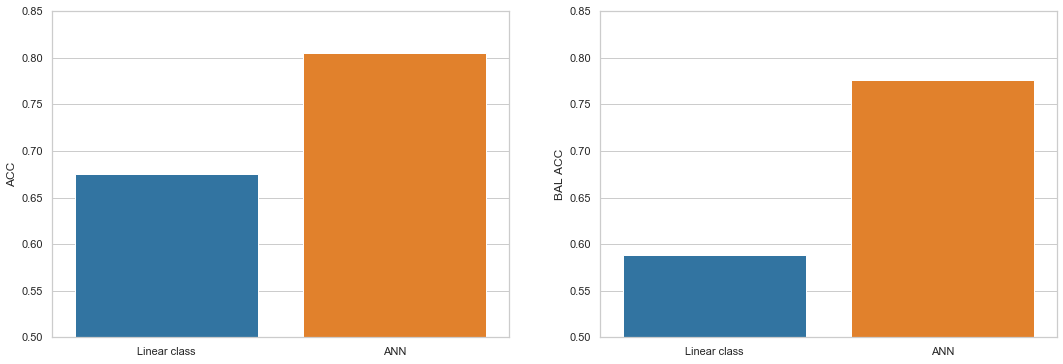

In [68]:
#use seaborn to generate barplots to compare the different algorithms
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=alg_list,y=summary['ACC'],ax=axes[0])
sns.barplot(x=alg_list,y=summary['BAL ACC'],ax=axes[1])
axes[0].set(ylim=(0.5, 0.85))
axes[1].set(ylim=(0.5, 0.85))

***
# <span style="color:#0741ad">A More In-Depth Look at the Dataset</span>
***
In this notebook we used the data contained in the datase from Kaggle as it is, apart from the scaling operation. The output of the *info()* method is:

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies       768 non-null int64
glucose           768 non-null int64
blood_pressure    768 non-null int64
skin_thickness    768 non-null int64
insulin           768 non-null int64
bmi               768 non-null float64
pedi              768 non-null float64
age               768 non-null int64
diabetes_onset    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the above it appears that each column contains exactly 768 entries, without any missing data. Now, let's have a closer look at the content of the dataset through the *hist()* method of Pandas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB5F90A1C8>,
      dtype=object)

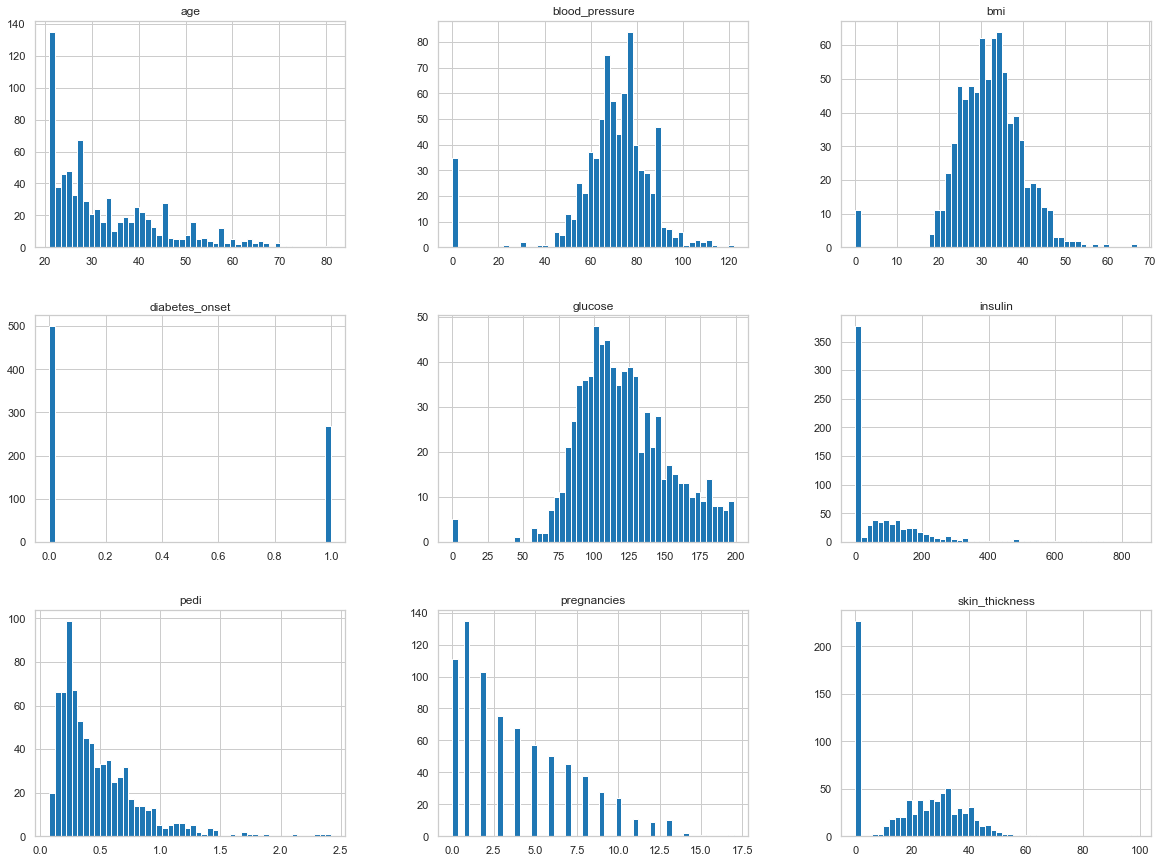

In [70]:
df.hist(bins=50, figsize=(20, 15))

A critical analysis of the histogram plots above reveals the following: whilst a value of zero is perfectly acceptable for the *pregnancies*, a zero value for features such as *bmi* or *blood_pressure* is not realistic. Effectively, these zero values should be considered as missing values, even if this was not obvious from the EDA that we performed before.

The question that arises now is: how do we deal with these missings values? This is a key part of a discipline known as **feature engineering**, and is of paramount importance when dealing with "real-life" datasets, which in most cases are far from being perfect or complete. An informative overview on feature engineering is given in [this post](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114).

The most obvious approach to deal with this issue is to drop the observations with missing data from the database. Whilst this is a quick way of dealing with missing data (and sometimes it can be the only reasonable option), this will of course result in a reduction of the number of observations available to train and test our ML algorithms. A less obvious option is the so-called *numerical imputation*. In this approach we infer the values of the missing data from the existing data within the dataset or from external knowledge about the nature of the problem that we are trying to solve. Whilst this is more time consuming than dropping the observations with missing data, this approach has the benefit of preserving the size of the data set which, in turn, might result in the development of more accurate models.

A good exercise for the present problem would be: how can we infer the value of the missing data in the given dataset? Refer to the blog post linked above for some hints ...